In [3]:
# Importando biblitoecas
import pandas as pd
import numpy as np

#visualizaçção
import matplotlib.pyplot as plt
import seaborn as sns

# datas
from datetime import date

#ignorar avisos
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# importando dataset
df_total = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
df_total

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15801,139,2021-09-27,Brazil,SC,TOTAL,0,19199,0,1188580,19199,...,2320266.0,32384.29385,5156201.0,71.96586,2656676.0,37.07962,239451.0,3.34205,637.0,0.00889
15802,139,2021-09-27,Brazil,SE,TOTAL,0,6008,0,278014,6008,...,596253.0,25938.74962,1559765.0,67.85434,816791.0,35.53280,40036.0,1.74168,NaN,NaN
15803,139,2021-09-27,Brazil,SP,TOTAL,0,149109,0,4360931,149109,...,14183490.0,30888.03080,36702529.0,79.92877,24273521.0,52.86155,1155270.0,2.51588,325297.0,0.70841
15804,139,2021-09-27,Brazil,TO,TOTAL,0,3774,0,223593,3774,...,664721.0,42261.76928,956785.0,60.83067,459441.0,29.21043,30551.0,1.94238,284.0,0.01806


In [5]:
#df_total.drop(['vaccinated','vaccinated_per_100_inhabitants','vaccinated_second','vaccinated_second_per_100_inhabitants','vaccinated_single','vaccinated_single_per_100_inhabitants','vaccinated_third','vaccinated_third_per_100_inhabitants'], axis='columns', inplace=True)

In [6]:
df_total.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Traduzindo as colunas
columns = {'epi_week':'semana','date':'data','country':'pais','state':'estado','city':'cidade','newDeaths':'novosObitos',
           'deaths':'Obitos','newCases':'novosCasos','totalCases':'Casos','deathsMS':'obitosMS','totalCasesMS':'casosMS',
           'deaths_per_100k_inhabitants':'obitos_por_100k','totalCases_per_100k_inhabitants':'casos_por_100k',
           'deaths_by_totalCases':'obitos_por_casos','recovered':'recuperados','suspects':'suspeitos','tests':'testes',
           'tests_per_100k_inhabitants':'testes_por_100k'}

In [8]:
# renomeando as colunas
df_total = df_total.rename(columns=columns)
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,testes,testes_por_100k,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# criando uma variavei e atribuindo os valores que forem diferente de total no estado em df
# transformando a variavel data em datetime, pois pode estar como string
df = df_total[df_total['estado']!= 'TOTAL'] 
df['data'] = pd.to_datetime(df_total['data']).dt.date

df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,testes,testes_por_100k,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Óbitos')

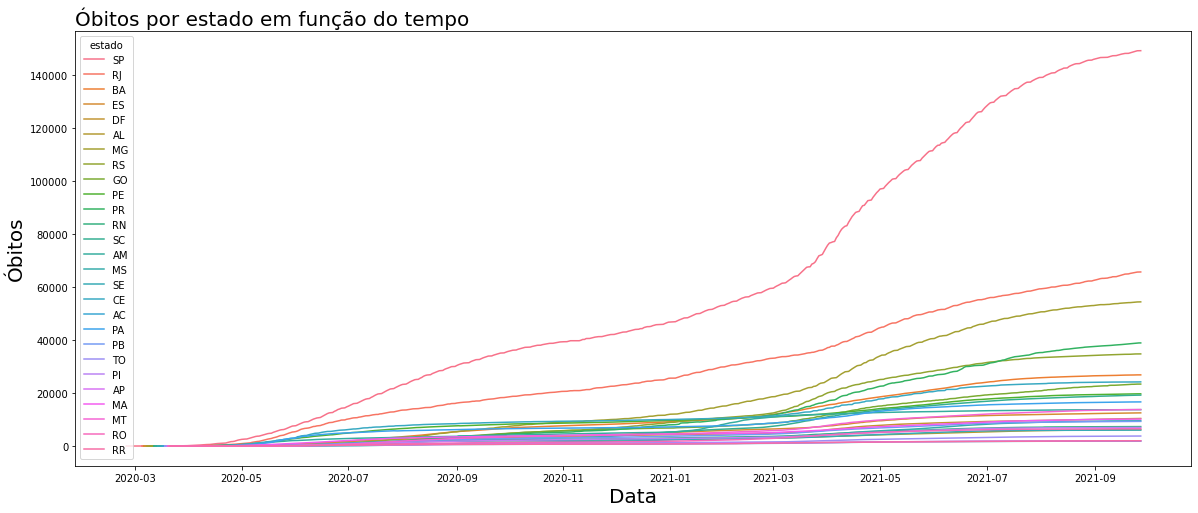

In [10]:
# plotando
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=20)
fig.set_xlabel('Data', fontsize=20)
fig.set_ylabel('Óbitos', fontsize=20)

In [11]:
# analiando somente São Paulo
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,testes,testes_por_100k,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# analiando somente São Paulo
df_rj = df[df['estado'] == 'RJ']
df_rj.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,testes,testes_por_100k,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


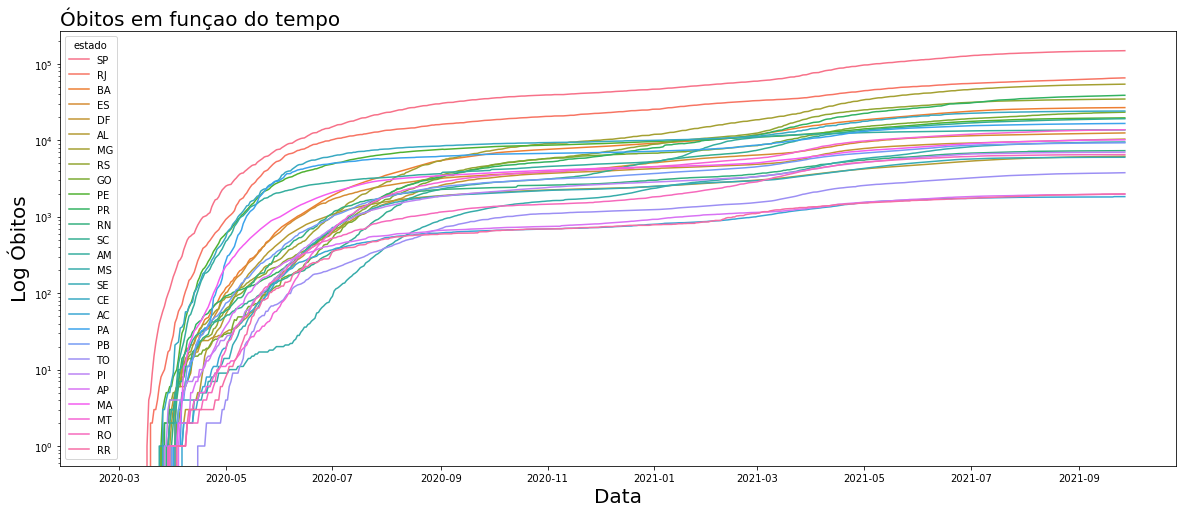

In [13]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos',hue='estado', data=df)
fig.set_title('Óbitos em funçao do tempo', loc='left', fontsize=20)
fig.set_xlabel('Data', fontsize=20)
fig.set_ylabel('Log Óbitos', fontsize=20)

#Aplicando o logartimo na y(variavel dependente)
fig.set_yscale('log')

Text(0, 0.5, 'Óbitos')

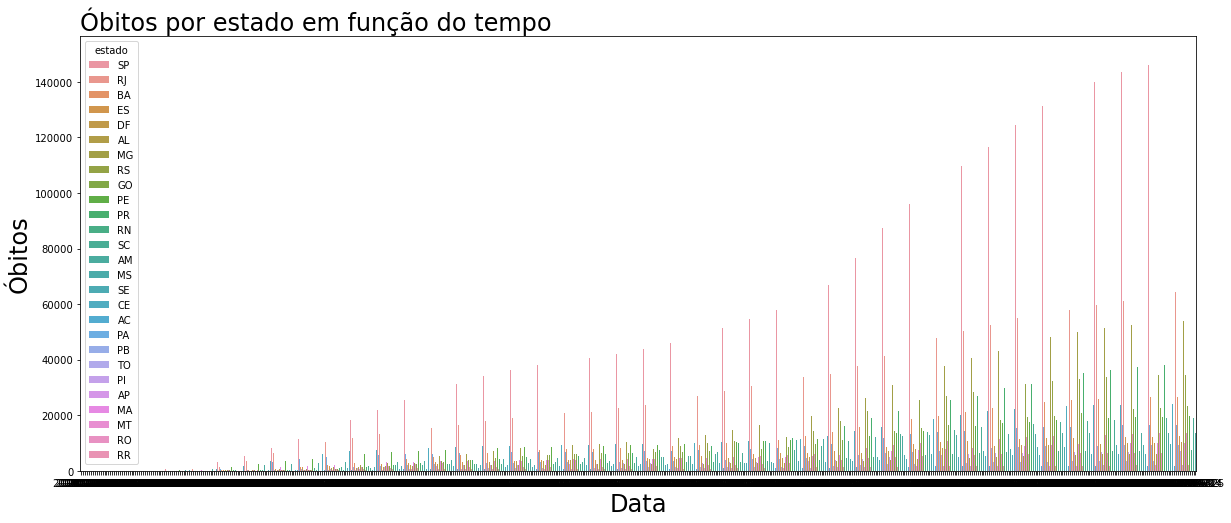

In [11]:
# Plotando em barras - Só para fim de curiosidade
plt.figure(figsize=(20,8))

fig = sns.barplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Óbitos',fontsize=24)

In [14]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,testes,testes_por_100k,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


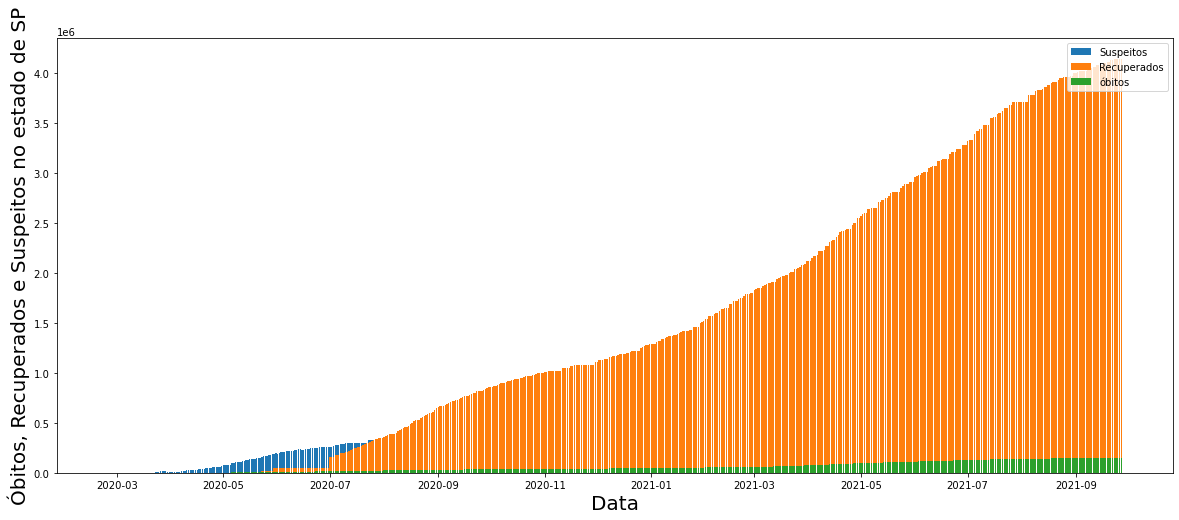

In [15]:
# Plotando garfico de barras
# Nesse caso estamos utlizando matplot
plt.figure(figsize=(20,8))

fig = plt.bar(df_sp.data, df_sp.suspeitos, label='Suspeitos')
plt.bar(df_sp.data, df_sp.recuperados, label='Recuperados')
plt.bar(df_sp.data, df_sp.Obitos, label='óbitos')

plt.xlabel('Data', fontsize=20)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP', fontsize=20, rotation=90)

plt.legend()

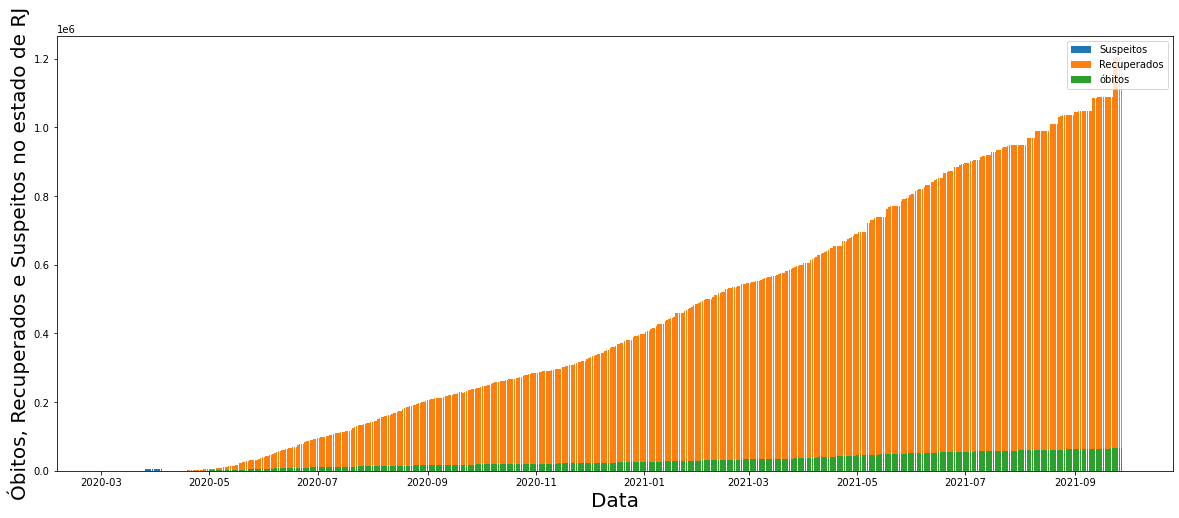

In [16]:
# Plotando garfico de barras
# Nesse caso estamos utlizando matplot
plt.figure(figsize=(20,8))

fig = plt.bar(df_rj.data, df_rj.suspeitos, label='Suspeitos')
plt.bar(df_rj.data, df_rj.recuperados, label='Recuperados')
plt.bar(df_rj.data, df_rj.Obitos, label='óbitos')

plt.xlabel('Data', fontsize=20)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de RJ', fontsize=20, rotation=90)

plt.legend()

Percebemos que o número de pacientes recuperados teve uma alta muito brusca no mês de julho/2020. Isso ocorreu porque, no primeiro dia do mês, o estado de São Paulo divulgou, pela primeira vez, o número de recuperados que não precisaram de internação hospitalar. Anteriormente, a secretaria estadual da Saúde calculava apenas o total de altas hospitalares entre pacientes internados com Covid-19

Fonte: https://g1.globo.com/sp/sao-paulo/noticia/2020/07/01/governo-de-sp-divulga-pela-1a-vez-total-de-recuperados-entre-casos-leves-de-covid-19-e-numero-somados-as-altas-hospitalares-vai-a-157-mil.ghtml

### Criando  função para otimizar o processo de análise exploratória

In [17]:
def plotar_linha(titulo, xlabel, ylabel, x, y, dataset, hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20, rotation=90)

In [18]:
def plotar_barra(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,8))
    ax = plt.bar(dataset[x],dataset[y]) # Detalhe, input pede que seja colocado como string
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=90)

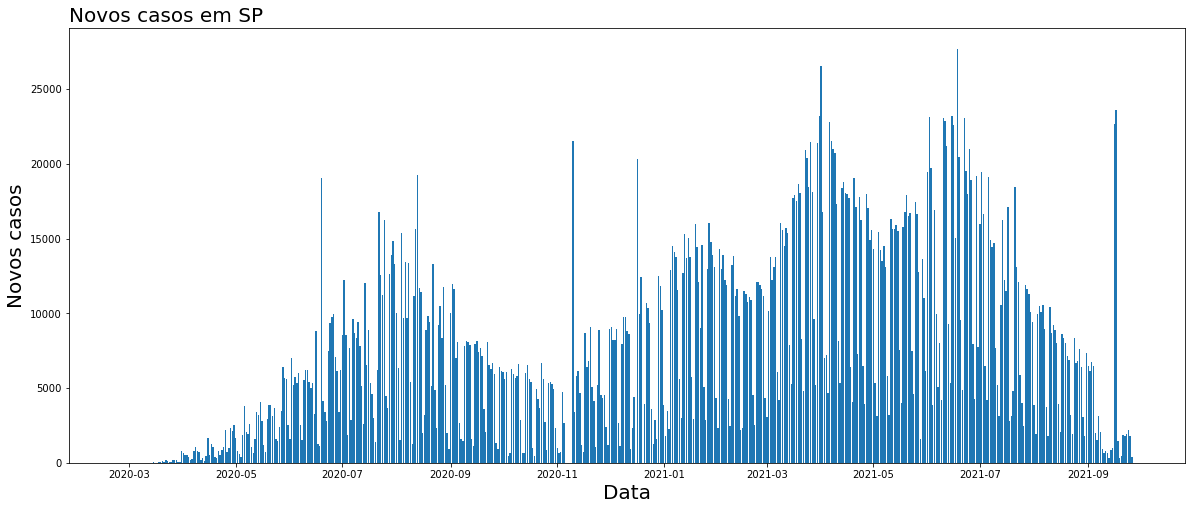

In [19]:
plotar_barra('Novos casos em SP', 'Data', 'Novos casos', 'data','novosCasos', df_sp)

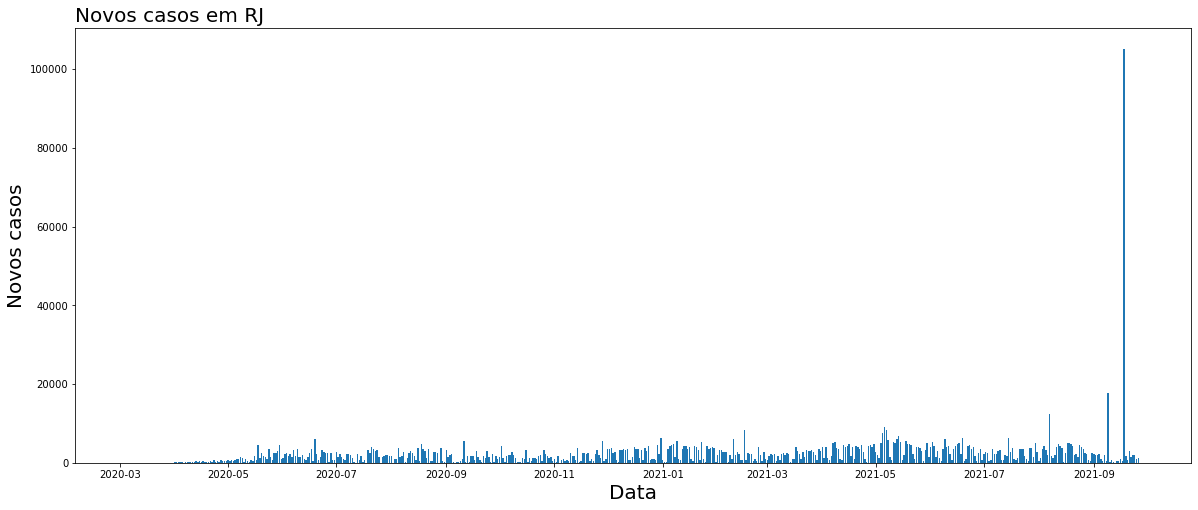

In [20]:
plotar_barra('Novos casos em RJ', 'Data', 'Novos casos', 'data','novosCasos', df_rj)

In [21]:
# Crinado uma nova coluna, para saber como esta aceleraçao dos casos
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp['aceleracaoRecuperados'] = df_sp['recuperados'].diff()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN


In [22]:
# Crinado uma nova coluna, para saber como esta aceleraçao dos casos
df_rj['aceleracaoCasos'] = df_rj['novosCasos'].diff()
df_rj['aceleracaoObitos'] = df_rj['novosObitos'].diff()
df_rj['aceleracaoRecuperados'] = df_rj['recuperados'].diff()
df_rj.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN


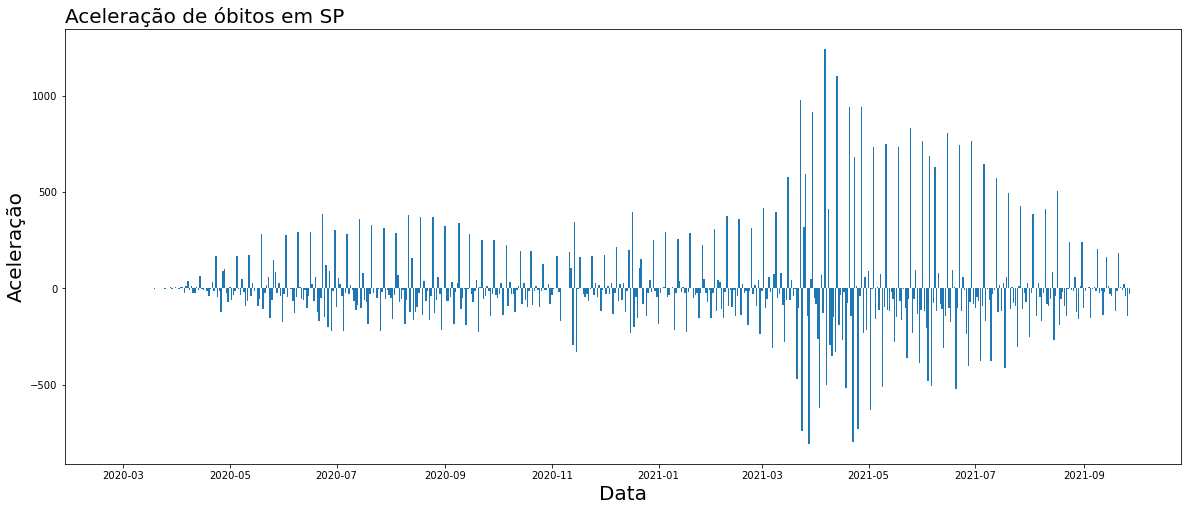

In [23]:
plotar_barra('Aceleração de óbitos em SP', 'Data', 'Aceleração','data', 'aceleracaoObitos', df_sp)

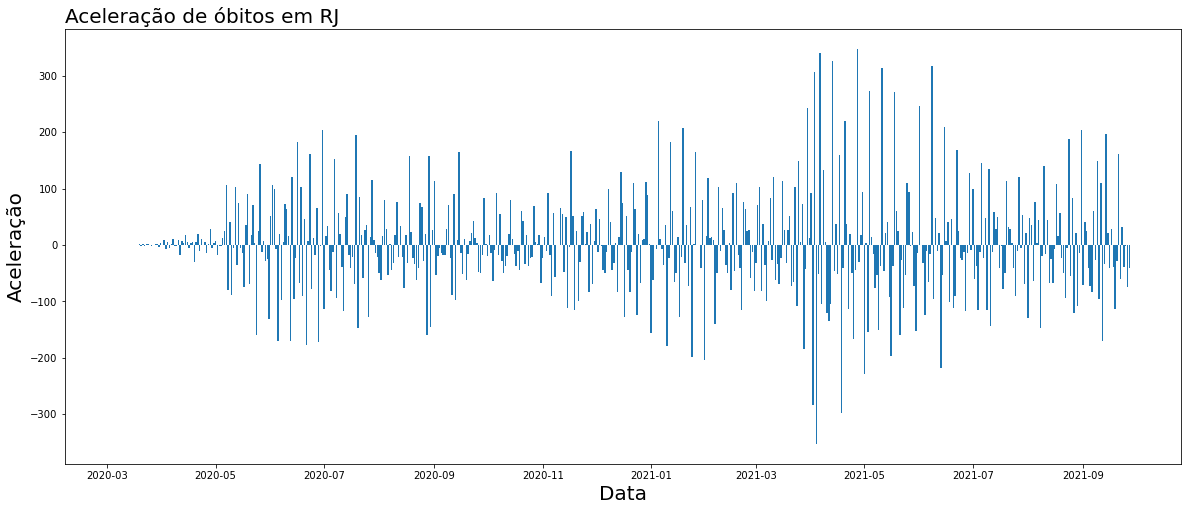

In [24]:
plotar_barra('Aceleração de óbitos em RJ', 'Data', 'Aceleração','data', 'aceleracaoObitos', df_rj)

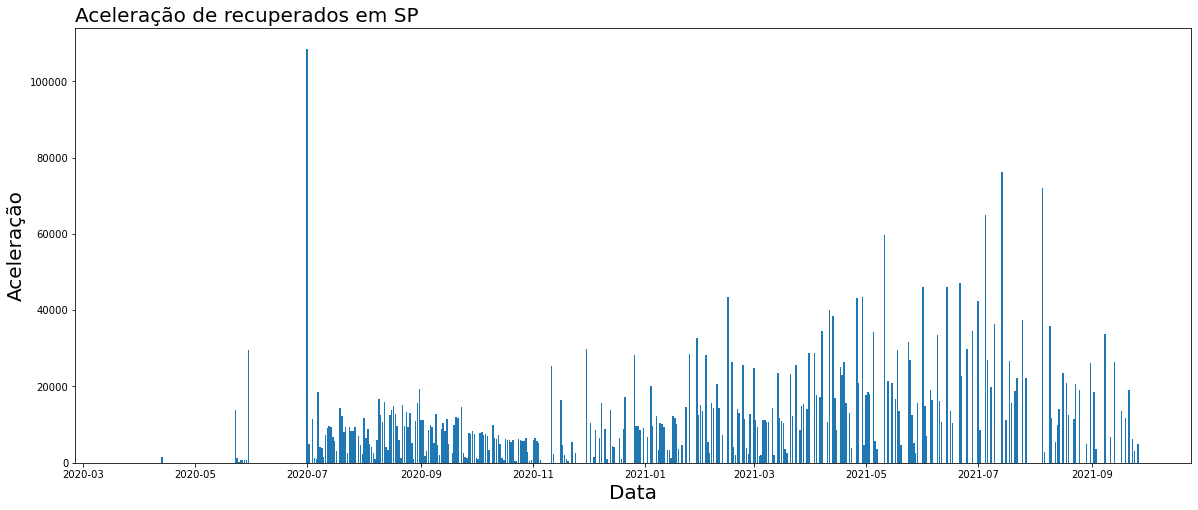

In [25]:
plotar_barra('Aceleração de recuperados em SP','Data','Aceleração','data','aceleracaoRecuperados',df_sp)

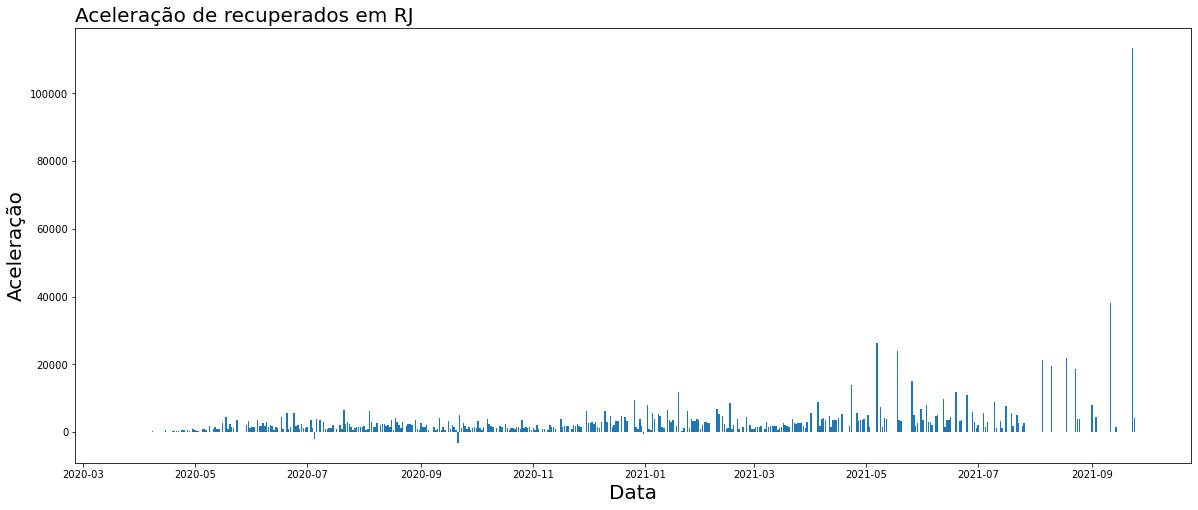

In [26]:
plotar_barra('Aceleração de recuperados em RJ','Data','Aceleração','data','aceleracaoRecuperados',df_rj)

In [27]:
# Realizando a media móvel de 7 dias e center False, pra nao dar peso para os valores do meio
# calculando tambem a media movel de 14 dias, devido a periodo de quarentena
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7, center=False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14, center=False).mean()

df_sp.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN


In [28]:
# Realizando a media móvel de 7 dias e center False, pra nao dar peso para os valores do meio
# calculando tambem a media movel de 14 dias, devido a periodo de quarentena
df_rj['mediaObitos'] = df_rj.novosObitos.rolling(window=7, center=False).mean()
df_rj['mediaObitos_14'] = df_rj.novosObitos.rolling(window=14, center=False).mean()

df_rj.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
53,11,2020-03-10,Brazil,RJ,TOTAL,0,0,5,8,0,...,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN
62,11,2020-03-11,Brazil,RJ,TOTAL,0,0,5,13,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
74,11,2020-03-12,Brazil,RJ,TOTAL,0,0,3,16,0,...,NaN,NaN,NaN,NaN,NaN,-2.0,0.0,NaN,0.0,NaN
89,11,2020-03-13,Brazil,RJ,TOTAL,0,0,0,16,0,...,NaN,NaN,NaN,NaN,NaN,-3.0,0.0,NaN,0.0,NaN
105,11,2020-03-14,Brazil,RJ,TOTAL,0,0,6,22,0,...,NaN,NaN,NaN,NaN,NaN,6.0,0.0,NaN,0.0,NaN


<BarContainer object of 581 artists>

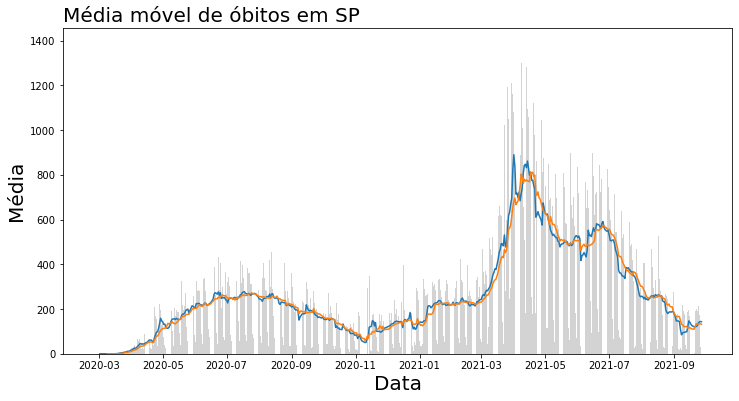

In [29]:
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos', df_sp, None)
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos_14', df_sp, None)
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

<BarContainer object of 572 artists>

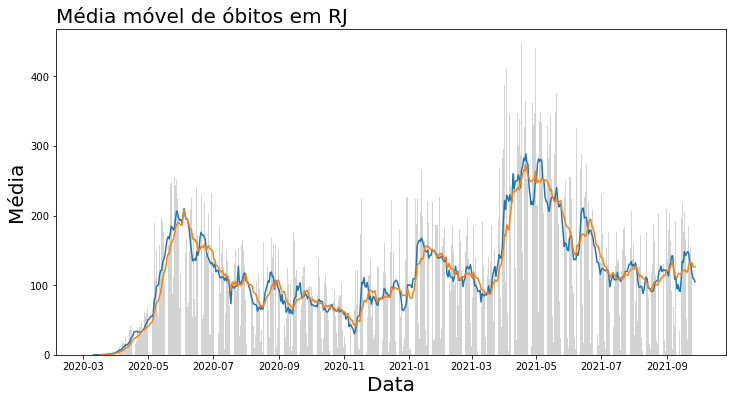

In [30]:
plotar_linha('Média móvel de óbitos em RJ', 'Data', 'Média', 'data', 'mediaObitos', df_rj, None)
plotar_linha('Média móvel de óbitos em RJ', 'Data', 'Média', 'data', 'mediaObitos_14', df_rj, None)
plt.bar(df_rj['data'], df_rj['novosObitos'], color='lightgrey')

In [31]:
# Processo de análise de Autocorrelação
from pandas.plotting import autocorrelation_plot

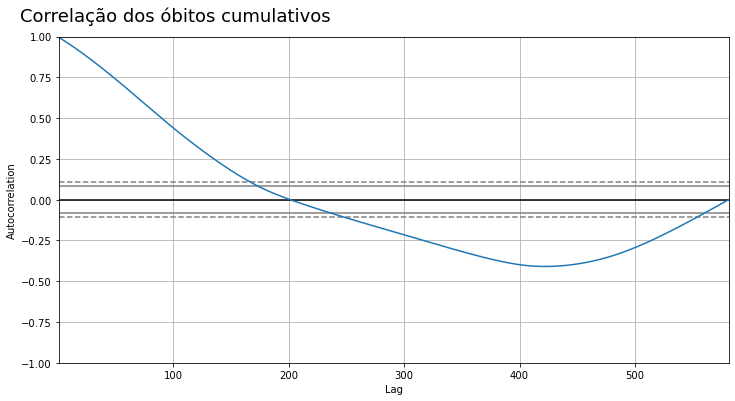

In [32]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos óbitos cumulativos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['Obitos'])
ax = ax

Analisando podemos ver que antes de 80dias(lag=dias) tinha uma autocorrelacao forte, o numero de mortes por dia era muito parecidos

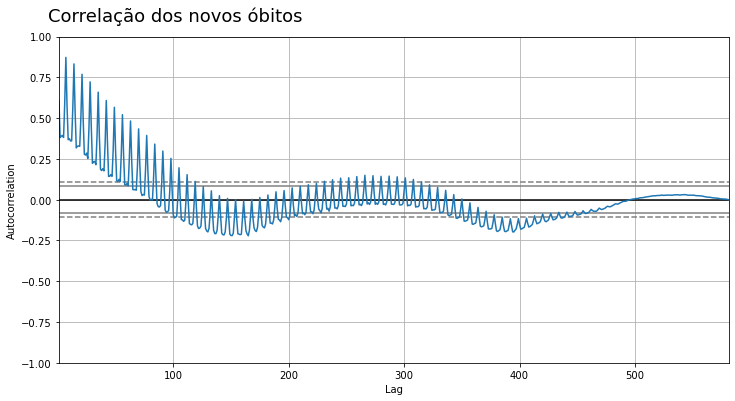

In [33]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['novosObitos'])
ax = ax

Percebemos que temos oscilação, por conta da sazonalidade

#### Nesse caso vamos ulilizar a média móvel porém com autocorrelação

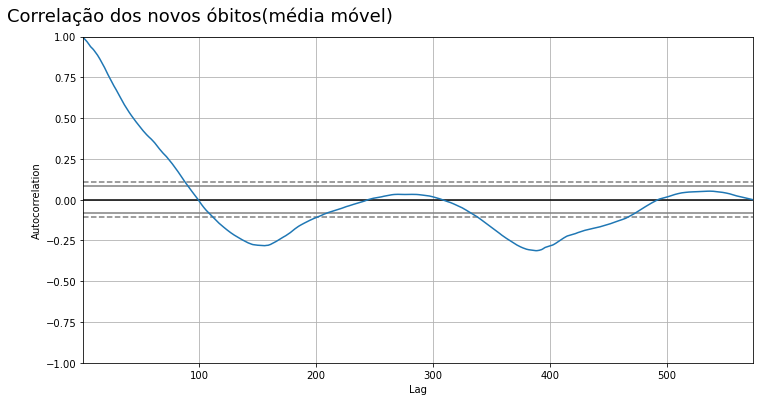

In [34]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos(média móvel)', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['mediaObitos'][7:]) # como a média é de 7 dias, vamos por da 7 data em diante
ax = ax

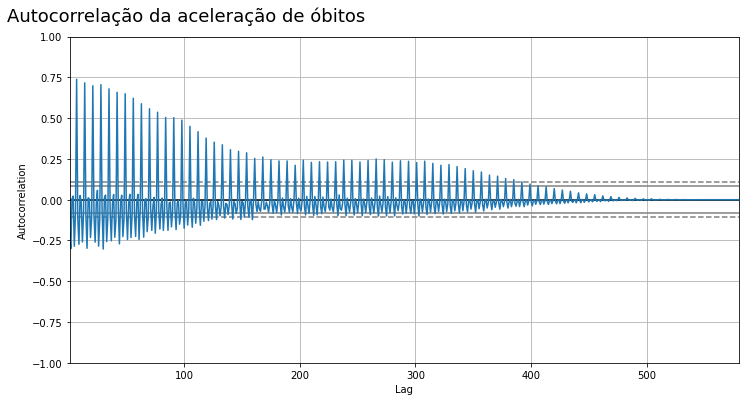

In [35]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da aceleração de óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:]) # do indice 1 em diante, pois o 0 é na
ax = ax

Concluimos que,  a medida que o tempo vai passando a autocorrelação vai diminuindo, poq os eventos deixam de ser autocorrelacioandos ou dependentes

In [36]:
# média móvel da aceleração e ver qual a relevância da sazonalidade
df_sp['mediaAccObitos'] = df_sp['aceleracaoObitos'][1:].rolling(window=7,center=False).mean()

In [37]:
# média móvel da aceleração e ver qual a relevância da sazonalidade
df_rj['mediaAccObitos'] = df_rj['aceleracaoObitos'][1:].rolling(window=7,center=False).mean()

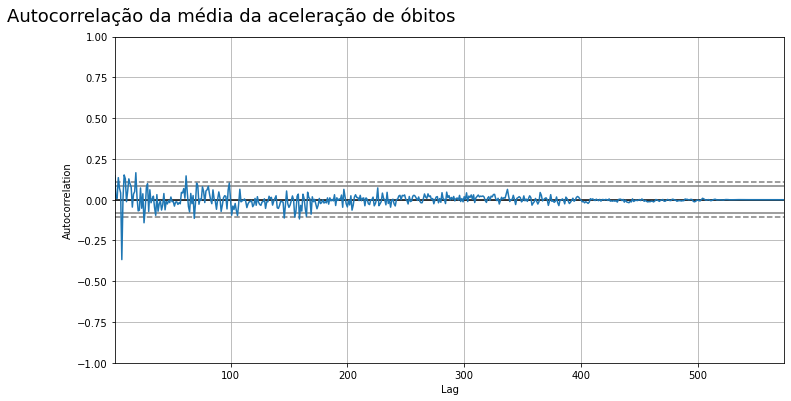

In [38]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da média da aceleração de óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['mediaAccObitos'][7:])
ax=ax

Evento da média de aceleracao com baixo nível de autocorrelação

**Verificamos que tem uma autocorreção alta ao longo de uma semana, nesse caso podemos dizer que há uma sazonalidade**


In [39]:
# Criando a variavel dia da semana com os dias dos casos 
df_sp['mes'] = pd.to_datetime(df['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,vaccinated_third,vaccinated_third_per_100_inhabitants,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mediaAccObitos,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,2020-02-29,Saturday


In [40]:
# Criando a variavel dia da semana com os dias dos casos 
df_rj['mes'] = pd.to_datetime(df['data'])
df_rj['dia_da_semana'] = df_rj['mes'].dt.day_name()
df_rj.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,vaccinated_third,vaccinated_third_per_100_inhabitants,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mediaAccObitos,mes,dia_da_semana
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,Thursday
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020-03-06,Friday
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,2020-03-07,Saturday
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2020-03-08,Sunday
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,2020-03-09,Monday


In [41]:
# traduzindo
dias_traduzidos = {'Monday': 'Segunda', 
                    'Tuesday': 'Terça', 
                    'Wednesday': 'Quarta', 
                    'Thursday': 'Quinta', 
                    'Friday': 'Sexta', 
                    'Saturday': 'Sabado',
                    'Sunday': 'Domingo'}

df_sp.dia_da_semana= df_sp.dia_da_semana.map(dias_traduzidos)
df_rj.dia_da_semana= df_rj.dia_da_semana.map(dias_traduzidos)

In [42]:
# Agrupando os dias e coletando a média de tres tupo de casos
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean().round()
agrupados_sp.head()

,Obitos,novosObitos,aceleracaoObitos
dia_da_semana,,,
Domingo,58687.0,81.0,-196.0
Quarta,57692.0,343.0,-63.0
Quinta,58026.0,335.0,-8.0
Sabado,58606.0,277.0,-27.0
Segunda,58740.0,53.0,-29.0


In [43]:
# deixando como index o agrupados
agrupados_sp['dia_da_semana'] = agrupados_sp.index

In [44]:
agrupados_sp.head(7)

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,58687.0,81.0,-196.0,Domingo
Quarta,57692.0,343.0,-63.0,Quarta
Quinta,58026.0,335.0,-8.0,Quinta
Sabado,58606.0,277.0,-27.0,Sabado
Segunda,58740.0,53.0,-29.0,Segunda
Sexta,58329.0,303.0,-31.0,Sexta
Terça,57349.0,405.0,357.0,Terça


In [45]:
# ordendando o indice
agrupados_sp = agrupados_sp.reindex(['Domingo', 'Segunda', 'Terça','Quarta', 'Quinta', 'Sexta', 'Sabado'])

<AxesSubplot:xlabel='dia_da_semana', ylabel='novosObitos'>

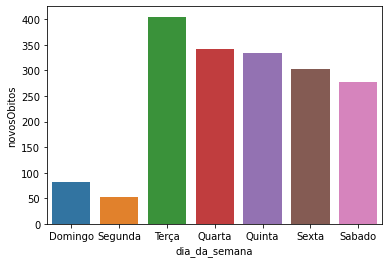

In [46]:
# Plotando o caso de novas mortes por dia
sns.barplot(agrupados_sp['dia_da_semana'], agrupados_sp.novosObitos)

In [212]:
# criando uma função para fazer o comparativo de mês em mês
# nesse caso criando novas variaveis com a que ja temos 
def criar_features(df, label=None):
    df = df.copy()   
    df['diasemana'] = df['mes'].dt.weekday
    df['diames'] = df['mes'].dt.day
    df['mes'] = df['mes'].dt.month
    
    X = df[['diasemana', 'mes', 'diames']]
    
    if label:
        y = df[label]
        return X, y
    return X

In [214]:
# utlizando os dados
X, y = criar_features(df_sp, label='Obitos')

In [49]:
# concatenando os dados da x e y e inserindo no df final
df_final = pd.concat([X,y], axis=1)

In [50]:
df_final.head(10)

,diasemana,mes,diames,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


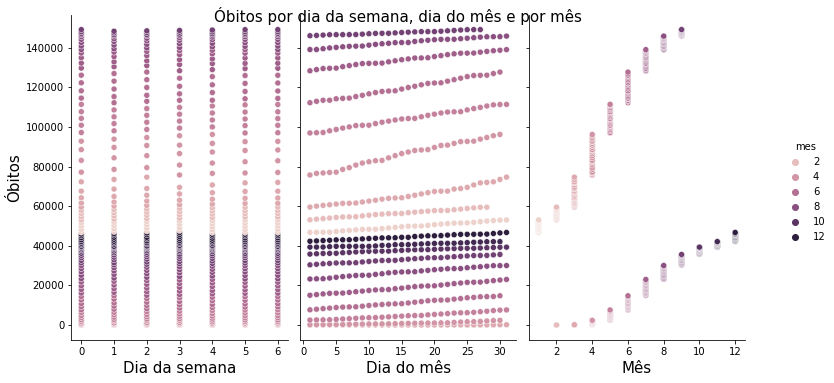

In [51]:
g = sns.pairplot(df_final.dropna(), 
                hue='mes', 
                x_vars=['diasemana','diames','mes'],
                y_vars='Obitos')

g.fig.set_size_inches(12,6)

g.axes[0,0].set_xlabel('Dia da semana', fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês', fontsize=15)
g.axes[0,2].set_xlabel('Mês', fontsize=15)
g.axes[0,0].set_ylabel('Óbitos', fontsize=15)

plt.suptitle('Óbitos por dia da semana, dia do mês e por mês ', fontsize=15)
plt.show()

In [52]:
# modificando para semanas do ano

def criar_features_1(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    df['semana'] = df['mes'].dt.weekofyear

    X = df[['diasemana','mês','diamês','semana']]

    if label:
        y = df[label]
        return X,y
    return X

In [210]:
X, y = criar_features_1(df_sp, label='Obitos')

In [54]:
df_final2 = pd.concat([X,y], axis=1)

In [55]:
df_final2.head(10)

,diasemana,mês,diamês,semana,Obitos
0,1,2,25,9,0
2,2,2,26,9,0
4,3,2,27,9,0
6,4,2,28,9,0
8,5,2,29,9,0
10,6,3,1,9,0
12,0,3,2,10,0
14,1,3,3,10,0
16,2,3,4,10,0
19,3,3,5,10,0


Text(0.5, 0.98, 'Óbitos por semana')

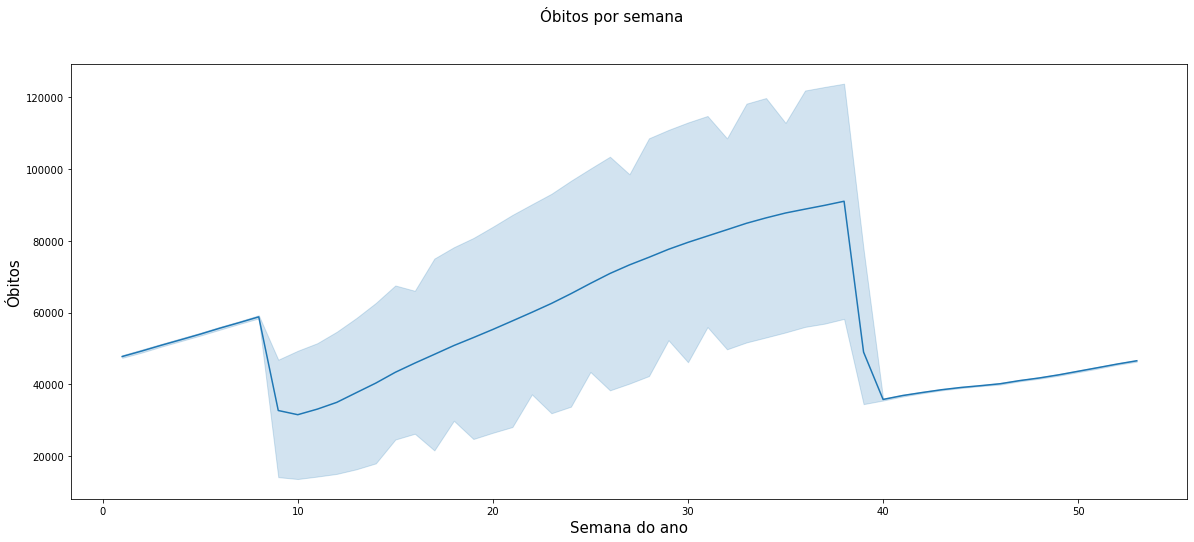

In [208]:
plt.figure(figsize=(20,8))
g = sns.lineplot(x='semana',y='Obitos',data=df_final2)

g.axes.set_xlabel('Semana do ano',fontsize=15)
g.axes.set_ylabel('Óbitos',fontsize=15)

plt.suptitle('Óbitos por semana',fontsize=15)

Taxa de óbitos por semana houve um crescimento até 37 semanas

In [142]:
df

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,testes,testes_por_100k,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15800,139,2021-09-27,Brazil,RS,TOTAL,0,34746,0,1433261,34746,...,5321254.0,46771.04876,8082895.0,71.04443,5043518.0,44.32989,301234.0,2.64769,692.0,0.00608
15801,139,2021-09-27,Brazil,SC,TOTAL,0,19199,0,1188580,19199,...,2320266.0,32384.29385,5156201.0,71.96586,2656676.0,37.07962,239451.0,3.34205,637.0,0.00889
15802,139,2021-09-27,Brazil,SE,TOTAL,0,6008,0,278014,6008,...,596253.0,25938.74962,1559765.0,67.85434,816791.0,35.53280,40036.0,1.74168,NaN,NaN
15803,139,2021-09-27,Brazil,SP,TOTAL,0,149109,0,4360931,149109,...,14183490.0,30888.03080,36702529.0,79.92877,24273521.0,52.86155,1155270.0,2.51588,325297.0,0.70841


### Iniciando análise de previsão temporal - COVID19

In [57]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,vaccinated_third,vaccinated_third_per_100_inhabitants,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mediaAccObitos,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,2020-02-29,Sabado


In [64]:
# importando biblioteca de teste estatísticos
# Vamos utilizar seasonal_decompose, pq permite que com os nossos dados ou série histórica,
# consiga decompor em tendências, sazonalidade, ruído 
# e a STL para que conseguimos plotar esses dados
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [65]:
# Realizando a decomposição  de minas gerais e rio de janeiro, para fins de comparação com SP
df_mg = df[df['estado']== 'MG']
df_rj = df[df['estado']== 'RJ']
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)

In [66]:
# realizando decomposição dentro da base de dados df_sp em 7 dias
resultados = seasonal_decompose(df_sp.novosObitos, freq=7)
resultados_mg = seasonal_decompose(df_mg.novosObitos, freq=7)
resultados_rj = seasonal_decompose(df_rj.novosObitos, freq=7)

In [67]:
# colocando as datas como indice para melhorar na visualização dos graficos
df_sp.index = pd.to_datetime(df_sp.data)

In [161]:
df.index = pd.to_datetime(df.data)

In [68]:
# Criando uma função para otimizar na hora de plotar graficos
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    
    plt.legend(fontsize=15)

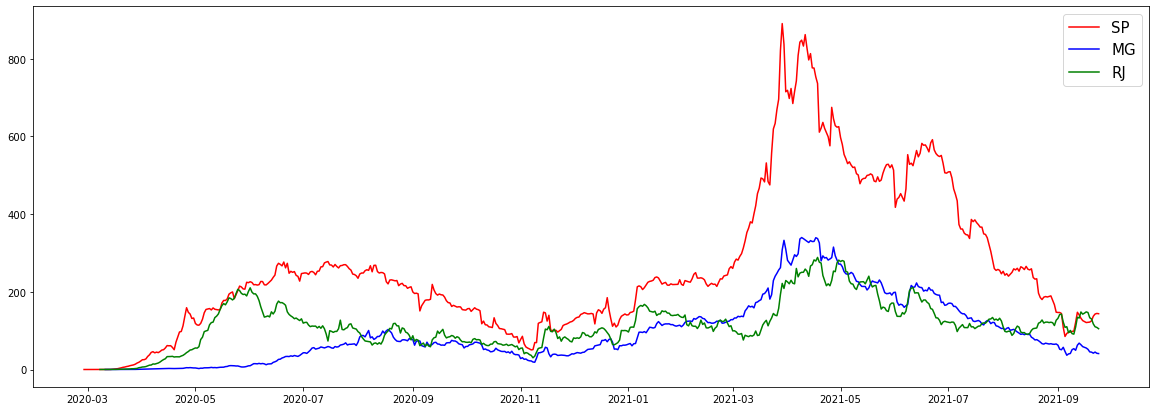

In [69]:
plotar(resultados.trend, resultados_mg.trend, resultados_rj.trend, 'red', 'blue', 'green',
      'SP','MG', 'RJ')

Analisando, São Paulo se apresenta maior em 2020/ até final de Agosto de 2021. Porém, no mês de setembro de 2021, Rio de Janeiro se demonstra superior com novos casos de mortes comparado a São Paulo e Minas Gerais

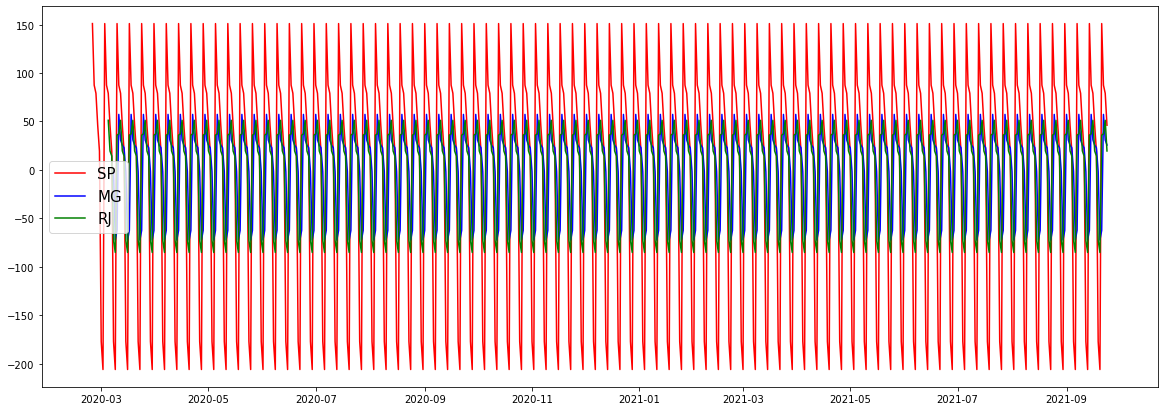

In [64]:
plotar(resultados.seasonal, resultados_mg.seasonal, resultados_rj.seasonal, 'red', 'blue', 'green',
      'SP','MG', 'RJ')

sazonalidade segue um padrão em ambos estados

## Teste ADF - teste de hipótese
### Calculo estatistico que vai definir o quão uma série temporal pode ser definida pela sua tendência.
**H0 = A série é não-estacionária e é dependente do tempo**


**HA = A série é estacionária**

In [70]:
from statsmodels.tsa.stattools import adfuller

In [181]:
y = df_sp['Casos']
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

In [182]:
adfuller(y.dropna())

(-1.5966546629228473,
 0.48527374461816547,
 15,
 565,
 {'1%': -3.4419770063102213,
  '5%': -2.866669060591297,
  '10%': -2.5695016312945413},
 10745.92475040981)

In [183]:
print('p-valor', adfuller(y.dropna())[1])

p-valor 0.48527374461816547


P valor acima de 0.05, nesse caso a série temporal nao é estacionária

### Breve conceito de acf e pacf

ACF e PACF são construções estatísticas teóricas, assim como um valor ou variação esperada, mas em domínios diferentes. Da mesma forma que os valores esperados aparecem no estudo de variáveis ​​aleatórias, o ACF e o PACF surgem no estudo de séries temporais.

In [184]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [185]:
def plotar_acf(y1, y2, y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2,title='1° Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3,title='2° Diferenciação')

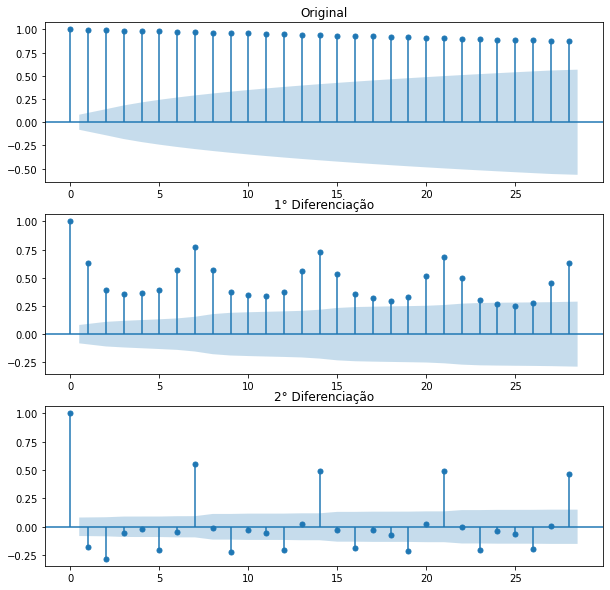

In [186]:
plotar_acf(y, y.diff().dropna(), y.diff().diff().dropna())

1° Gráfico podemos ver que na base original os casos sao altamente correlacionados

2° Ja conseguimos verificar a sazonalizade

3° Acredito que diferenciamos demais os dados, com isos gerando até uma autocorrelação negativa

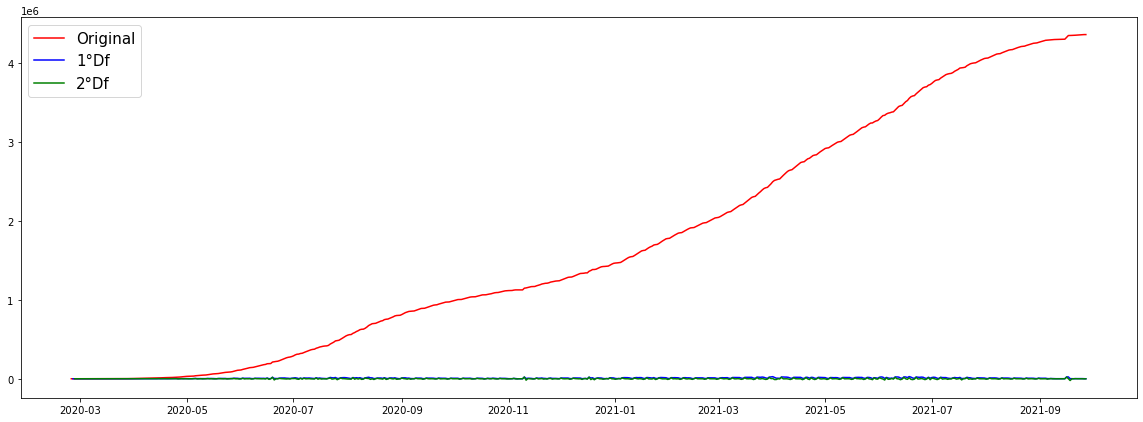

In [187]:
plotar(y,y.diff(), y.diff().diff(), 'red', 'blue', 'green', 'Original', '1°Df', '2°Df')

Nesse caso causamos uma sobrediferenciação, diferenciamos mais do que precisava. 


#### Olhando autocorrelação parcial

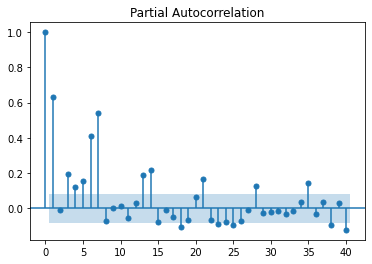

In [188]:
plot_pacf(y.diff().dropna(), lags=40);

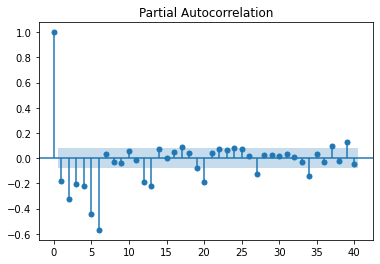

In [189]:
# Segunda diferenciação
plot_pacf(y.diff().diff().dropna(), lags=40);

Podemos ver que com essa autocorrelçao negativa, to manipulando demais os dados, portanto vamos reajustar diferenciando um pouco menos e claro vai sobrar um pouco de informação

###  ARIMA (p=1, d = 1, q = 1)

assumindo do mais simples primeiro

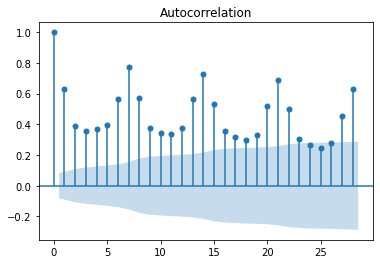

In [190]:
plot_acf(y.diff().dropna());

In [191]:
from statsmodels.tsa.arima_model import ARIMA

In [192]:
modelo = ARIMA(y, order=(1,1,1))
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Casos   No. Observations:                  580
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5740.914
Method:                       css-mle   S.D. of innovations           4811.423
Date:                Mon, 27 Sep 2021   AIC                          11489.827
Time:                        19:16:06   BIC                          11507.279
Sample:                    02-26-2020   HQIC                         11496.631
                         - 09-27-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7518.8449    530.908     14.162      0.000    6478.285    8559.405
ar.L1.D.Casos     0.6127      0.070      8.734      0.000       0.475       0.750
ma.L1.D.Casos     0.0321      0.101     

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [193]:
import itertools
p = d = q = range(0,2) # definindo que vai variar de 0 a 1
pdq = list(itertools.product(p,d,q))

In [194]:
# vefificando todas combinações em tuplas
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [195]:
# definindo as posições de p d q e 7 pq a sazonalidade acontece a cada 7 dias
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))] 

In [196]:
print('Exemplo de combinação de paramêtros para o ARIMA seasonal')
print('SARIMAX: {} x {} '.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {} '.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {} '.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {} '.format(pdq[2], seasonal_pdq[4]))

Exemplo de combinação de paramêtros para o ARIMA seasonal
SARIMAX: (0, 0, 1) x (0, 0, 1, 7) 
SARIMAX: (0, 0, 1) x (0, 1, 0, 7) 
SARIMAX: (0, 1, 0) x (0, 1, 1, 7) 
SARIMAX: (0, 1, 0) x (1, 0, 0, 7) 


In [197]:
# lendo a base que iremos fazer a combinação
y

data
2020-02-25          1
2020-02-26          1
2020-02-27          1
2020-02-28          2
2020-02-29          2
               ...   
2021-09-23    4356590
2021-09-24    4358788
2021-09-25    4360548
2021-09-26    4360931
2021-09-27    4360931
Name: Casos, Length: 581, dtype: int64

In [198]:
import statsmodels.api as sm
aic_lista=[] # criando uma lista
for param in pdq: # parametros pdq
    for param_seasonal in seasonal_pdq: # parametros sazonal
        mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warni

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warni

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warni

In [199]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC18643.17385361236',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC18252.930994450588',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC14296.9119785373',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC13930.830522655306',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC14619.889996147867',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC13890.142338035534',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC12453.757013796418',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC12433.452220201405',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC18218.181395875137',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC18128.671068719836',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC13668.152537245136',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC13057.047309766725',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC18085.36366741194',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC18086.209308757643',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC12010.048525305376',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC13739.658848804145',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC12302.546146056111',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC11854.70340500295

In [200]:
# Criando modelo final
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(0,1,1,7))

results = mod.fit()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


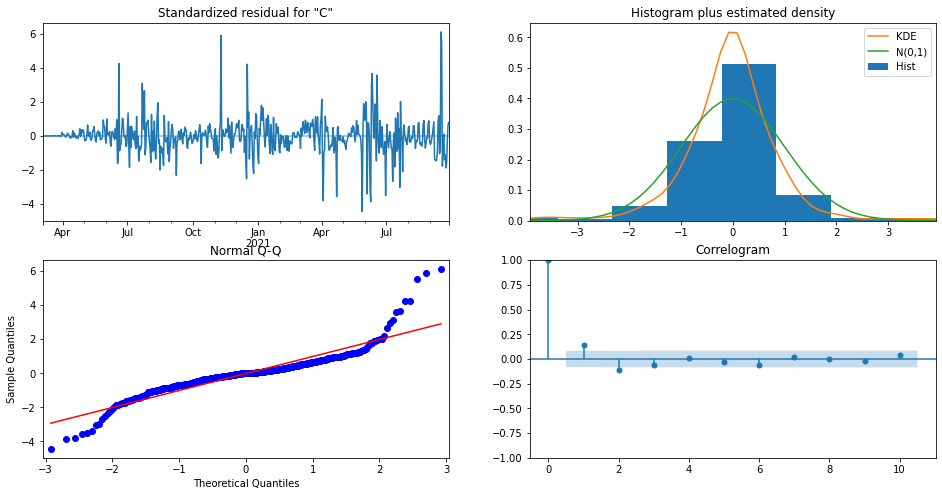

In [201]:
# rodando diagnosticos pra saber se esse modelo é o melhor
results.plot_diagnostics(figsize=(16,8))
plt.show()

1° gráfico representa os resíduos que de acordo com aumento de casos também aumenta.

2° gráfico, linha verde é uma distribuição normal, já a linha laranja e a distribuição dos resíduos, no caso quanto mais próximo da normal melhor, pois demonstra que os resíduos estão certamente distribuídos mas como nesse caso de série temporal os casos são muito crescentes ele tem um aumentos

3° As autocorrelações estao extramente baixas, significa que o modelo transformou em estacionário

4° Normal QQ,  uma certa variação mas ta bem razoável nosso modelo

In [202]:
# Realizando a previsão

pred = results.get_prediction(start=pd.to_datetime('2021-07-01'), dynamic=False)
#vamos criar um intervalo de confianca
pred_ic = pred.conf_int()
pred_ic

,lower Casos,upper Casos
2021-07-01,3.738380e+06,3.751218e+06
2021-07-02,3.754080e+06,3.766917e+06
2021-07-03,3.774040e+06,3.786878e+06
2021-07-04,3.781689e+06,3.794527e+06
2021-07-05,3.784177e+06,3.797015e+06
...,...,...
2021-09-23,4.356332e+06,4.369170e+06
2021-09-24,4.357551e+06,4.370388e+06
2021-09-25,4.354793e+06,4.367631e+06
2021-09-26,4.352410e+06,4.365248e+06


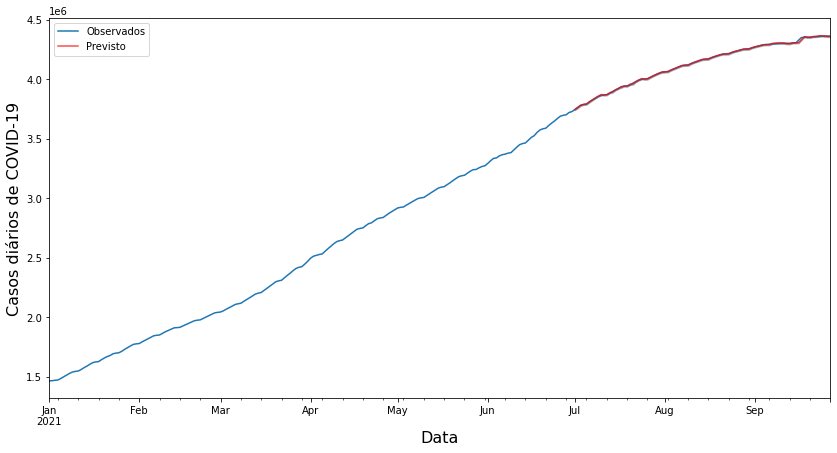

In [206]:
# Rondando modelo para dados ja observados
plt.figure(figsize=(14,7))
pred = results.get_prediction(start=pd.to_datetime('2021-07-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='Observados')
pred.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k',alpha=0.25)
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Casos diários de COVID-19',fontsize=16)
plt.show()

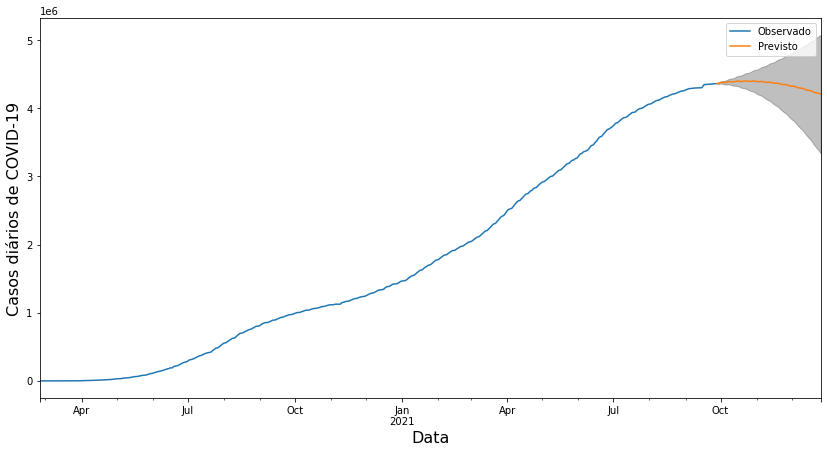

In [207]:
# Agora rodando o modelo para dados que nao temos - FAZENDO PREVISÃO
pred_uc = results.get_forecast(steps=90) # prevendo 90 dias
pred_ic = pred_uc.conf_int()

ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')

ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Casos diários de COVID-19',fontsize=16)

plt.legend()
plt.show()

In [173]:
#Baixando nova base atualizada para conferir o nivel de acuráncia do modelo

#df_att = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
##df_att = df_att[df_att['state'] == 'SP']
#df_att = df_att.rename(columns= {'date': 'data'})
#df_att.head()

In [174]:
#df_att['data'] = pd.to_datetime(df_att['data']).dt.date
#df_att.index= df_att['data']
#df_att.head()

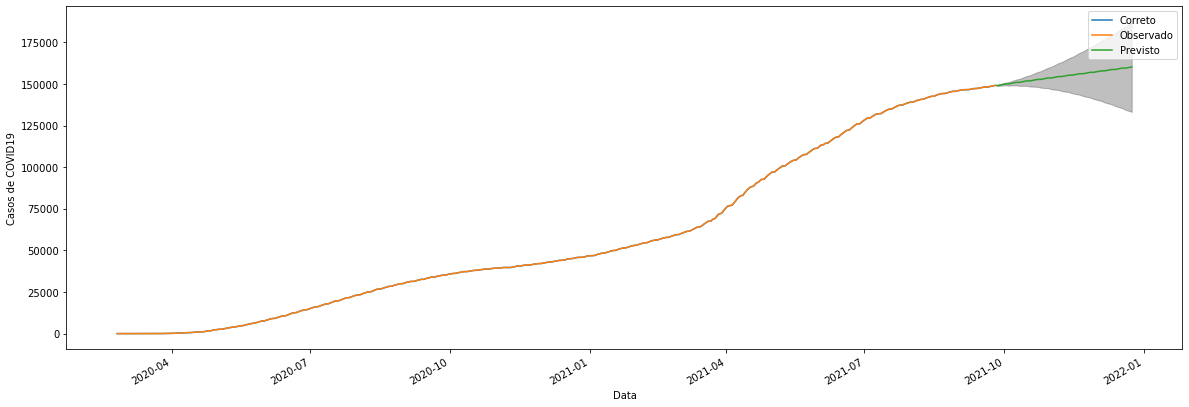

In [229]:
## Caso queiramos comparar com alguma base de dados antiga, para saber como o modelo prediou os dados, utiliza-se os dados abaixo

x = df_sp['Obitos']
plt.figure(figsize=(20,7))
fig = plt.plot(x, label='Correto')
ax = y.plot(label='Observado')
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID19')
plt.legend()
plt.show()

### Verificando os casos de óbitos no RJ

In [230]:
# Procesos inicial
df_total2 = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
df_total2 = df_total2[df_total2['state'] ==  'RJ'] 
df_total2.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
df_total2['date'] = pd.to_datetime(df_total2['date'])
df_total2.index = df_total2['date']
df_total2.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
date,,,,,,,,,,,,,,,,,,,,,
2020-03-05,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
df_total2['date'] = pd.to_datetime(df_total2['date'], format='%Y-%m-%d')
df_total2.index = df_total2['date']
df_total2.tail()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
date,,,,,,,,,,,,,,,,,,,,,
2021-09-21,138,2021-09-21,Brazil,RJ,TOTAL,185,65103,3103,1272342,64918,...,2313502.0,13399.9979,11470857.0,66.44017,6034766.0,34.95387,347301.0,2.01160,NaN,NaN
2021-09-22,138,2021-09-22,Brazil,RJ,TOTAL,124,65227,1528,1273870,65227,...,2313502.0,13399.9979,11528098.0,66.77171,6131302.0,35.51302,348544.0,2.01880,NaN,NaN
2021-09-23,138,2021-09-23,Brazil,RJ,TOTAL,155,65382,2062,1275932,65382,...,2313502.0,13399.9979,11611789.0,67.25646,6235438.0,36.11618,349063.0,2.02180,NaN,NaN
2021-09-24,138,2021-09-24,Brazil,RJ,TOTAL,116,65498,2099,1278031,65498,...,2313502.0,13399.9979,11672366.0,67.60732,6326228.0,36.64204,349738.0,2.02571,584.0,0.00338
2021-09-25,138,2021-09-25,Brazil,RJ,TOTAL,115,65613,875,1278906,65613,...,2313502.0,13399.9979,11777649.0,68.21713,6407776.0,37.11438,349898.0,2.02664,909.0,0.00527


In [233]:
y = df_total2['deaths']
y

date
2020-03-05        0
2020-03-06        0
2020-03-07        0
2020-03-08        0
2020-03-09        0
              ...  
2021-09-21    65103
2021-09-22    65227
2021-09-23    65382
2021-09-24    65498
2021-09-25    65613
Name: deaths, Length: 570, dtype: int64

In [234]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [235]:
# Parametros sazonais
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [236]:
print('SARIMAX: {}x{}'.format(pdq[1], seasonal_pdq[2]))

SARIMAX: (0, 0, 1)x(0, 1, 0, 7)


In [237]:
import statsmodels.api as sm
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_list.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warni

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warni

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warni

In [199]:
aic_list

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC16785.52672354001',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC16404.881026771105',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC12780.449272878159',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC12569.61872539783',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC13043.238701870694',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC12715.854265492517',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC12213.896954806169',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC12143.840536399573',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC16368.84866728164',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC16281.585008480255',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC12193.922394372572',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC12307.696730684293',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC16238.888889304264',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC16239.732162402282',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC11935.398763738787',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC11753.247154534401',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC11353.695406974757',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC11335.6210139501

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


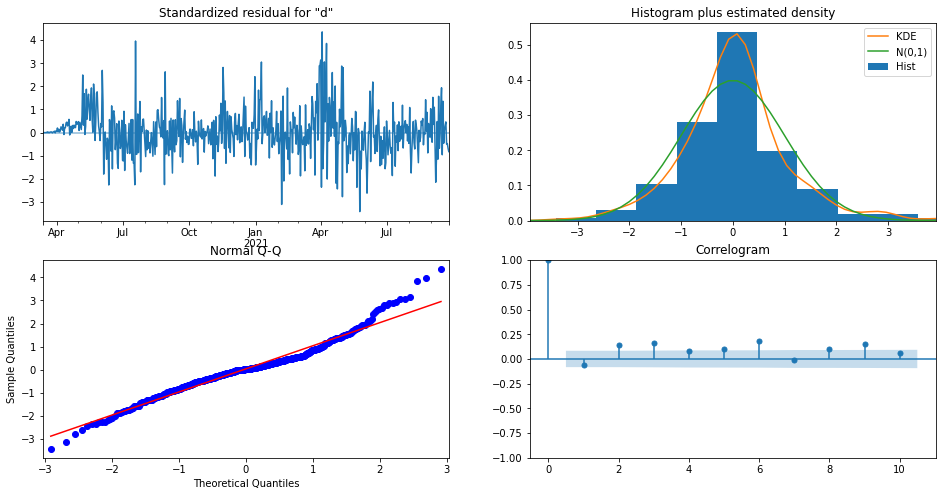

In [238]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,0), seasonal_order = (1, 1, 1, 7))
results = mod.fit()
results.plot_diagnostics(figsize=(16,8))
plt.show()

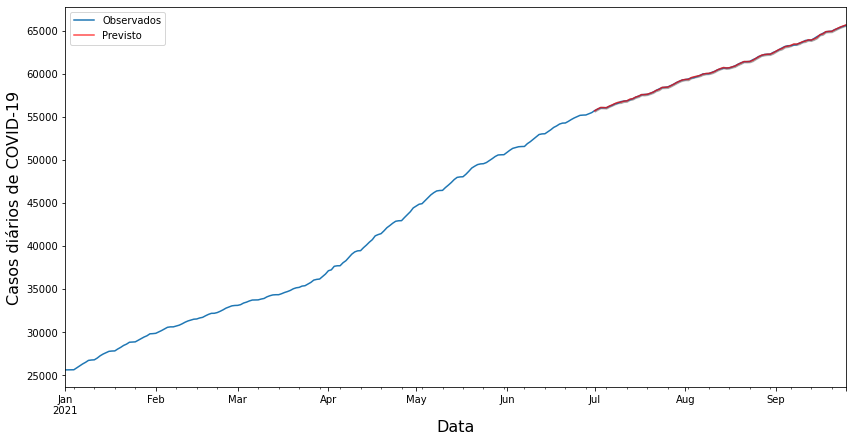

In [239]:
plt.figure(figsize=(14,7))
pred = results.get_prediction(start=pd.to_datetime('2021-07-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='Observados')
pred.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k',alpha=0.25)
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Casos diários de COVID-19',fontsize=16)
plt.show()

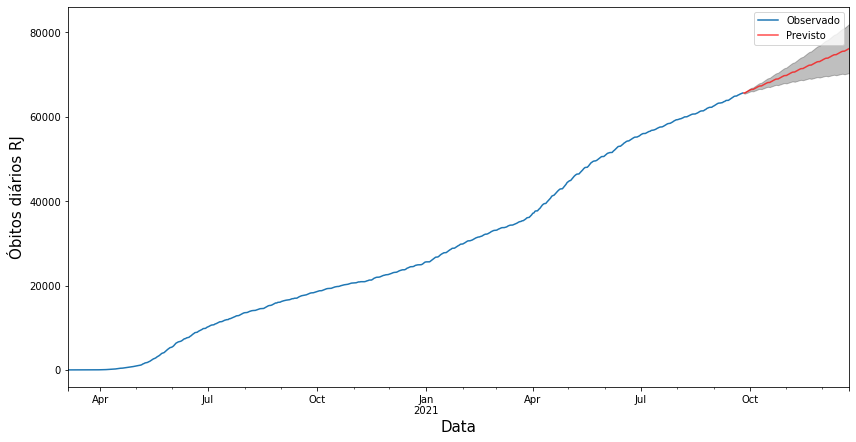

In [241]:
# Prevendo novos casos de óbitos
pred_uc = results.get_forecast(steps=90) # 90 dias
pred_ic = pred_uc.conf_int() # intervalo de confianca
ax = y.plot(label='Observado', figsize=(14,7)) # plotando y
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7) 
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1],color='k',  alpha=0.25)
ax.set_xlabel('Data', fontsize=15)
ax.set_ylabel('Óbitos diários RJ', fontsize=15)
plt.legend()

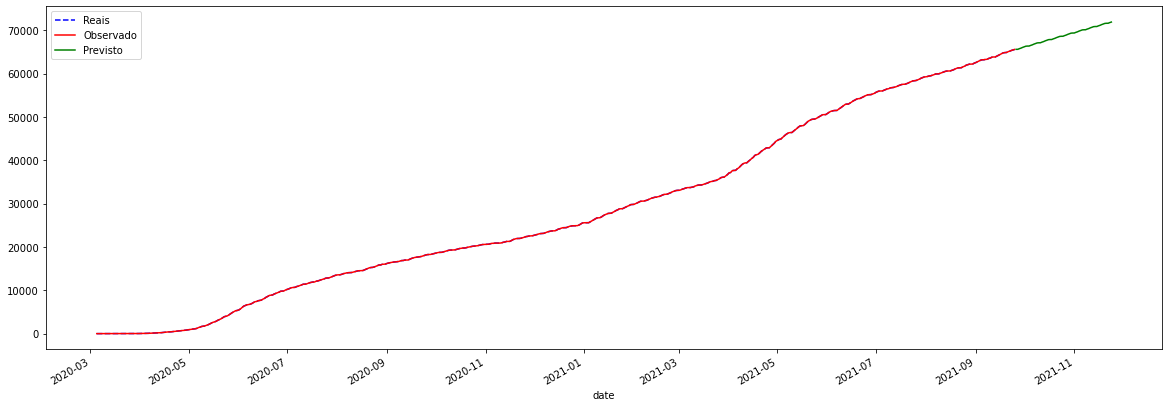

In [138]:
x = df_total2['deaths']
plt.figure(figsize=(20,7))
fig = plt.plot(x,linestyle='--',color='b',label='Reais')
ax = y.plot(label='Observado', color='red')
pred_uc.predicted_mean.plot(ax=ax, color='green', label='Previsto')
#ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1],color='k',alpha=0.25)
plt.legend()